In [1]:
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import pathlib
import cv2
from keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.models import Sequential, Model,load_model
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,MaxPool2D
from keras.preprocessing import image
from keras.initializers import glorot_uniform
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score, confusion_matrix
from sklearn.metrics import classification_report
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,MaxPool2D,Dropout
import tensorflow as tf
import splitfolders 
import pandas as pd
import glob
from sklearn.metrics import confusion_matrix
import itertools
import plotly.graph_objects as go
import plotly.express as px
#Suppressing Warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [3]:
! pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
train_path='/content/gdrive/MyDrive/train/train'
test_path='/content/gdrive/MyDrive/test'
val_path='/content/gdrive/MyDrive/validation/validation'

In [10]:
train_datagen = ImageDataGenerator(zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.15)
test_datagen = ImageDataGenerator()
val_datagen = ImageDataGenerator()
train_generator = train_datagen.flow_from_directory(train_path,target_size=(224, 224),batch_size=32,shuffle=True,class_mode='binary',classes=['Benign','Malign'])
test_generator = test_datagen.flow_from_directory(test_path,target_size=(224,224),batch_size=32,shuffle=False,class_mode='binary',classes=['Benign','Malign'])
val_generator = val_datagen.flow_from_directory(val_path,target_size=(224,224),batch_size=32,shuffle=False,class_mode='binary',classes=['Benign','Malign'])

Found 273 images belonging to 2 classes.
Found 0 images belonging to 2 classes.
Found 139 images belonging to 2 classes.


In [11]:
print(test_generator.class_indices)
print(train_generator.class_indices)
print(val_generator.class_indices)

{'Benign': 0, 'Malign': 1}
{'Benign': 0, 'Malign': 1}
{'Benign': 0, 'Malign': 1}


## Using a simple model as a baseline


In [12]:
model=tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(8,(3,3),activation ='relu', input_shape=(224,224,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(16,(3,3),activation ='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(32,(3,3),activation ='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(1024,activation='relu'),
    tf.keras.layers.Dense(512,activation='relu'),
    
    tf.keras.layers.Dense(1,activation='sigmoid')    
 ])

In [13]:
model.compile(loss = "binary_crossentropy", optimizer = "adagrad", metrics = ["accuracy","AUC"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 8)       224       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 8)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 16)      1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 32)        4640      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 32)       0

In [14]:
es=EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=10)
mc = ModelCheckpoint('./output/model.h5', monitor='val_accuracy', mode='max' )

In [15]:
H = model.fit(train_generator,validation_data=val_generator,epochs=15,verbose=1, callbacks=[es,mc])

Epoch 1/15
9/9 [==============================] - 88s 9s/step - loss: 31.7223 - accuracy: 0.6081 - auc: 0.5091 - val_loss: 17.7099 - val_accuracy: 0.7554 - val_auc: 0.5000
Epoch 2/15
9/9 [==============================] - 5s 567ms/step - loss: 4.7195 - accuracy: 0.7839 - auc: 0.6032 - val_loss: 4.3651 - val_accuracy: 0.7554 - val_auc: 0.5000
Epoch 3/15
9/9 [==============================] - 5s 575ms/step - loss: 3.7614 - accuracy: 0.6813 - auc: 0.4986 - val_loss: 2.6672 - val_accuracy: 0.7554 - val_auc: 0.5345
Epoch 4/15
9/9 [==============================] - 5s 565ms/step - loss: 1.8921 - accuracy: 0.7473 - auc: 0.5307 - val_loss: 4.3364 - val_accuracy: 0.2518 - val_auc: 0.6402
Epoch 5/15
9/9 [==============================] - 5s 564ms/step - loss: 1.3092 - accuracy: 0.7070 - auc: 0.6000 - val_loss: 1.9292 - val_accuracy: 0.7554 - val_auc: 0.6011
Epoch 6/15
9/9 [==============================] - 5s 562ms/step - loss: 0.9384 - accuracy: 0.7839 - auc: 0.6392 - val_loss: 1.9466 - val_acc

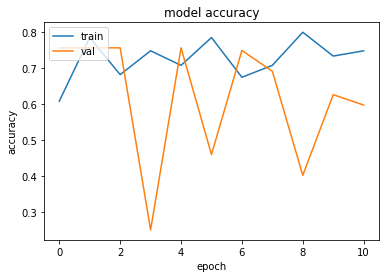

In [16]:
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Second Model with augmentation

In [18]:
model1=tf.keras.models.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip(
    mode="horizontal_and_vertical", seed=45),
    
    tf.keras.layers.Conv2D(8,(3,3),activation ='relu', input_shape=(224,224,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(16,(3,3),activation ='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(32,(3,3),activation ='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(1024,activation='relu'),
    tf.keras.layers.Dense(512,activation='relu'),
    
    tf.keras.layers.Dense(1,activation='sigmoid')    
 ])

In [20]:
model1.compile(loss = "binary_crossentropy", optimizer = "adagrad", metrics = ["accuracy","AUC"])
# model1.summary()

In [21]:
H1 = model.fit(train_generator,validation_data=val_generator,epochs=15,verbose=1, callbacks=[es,mc])

Epoch 1/15
9/9 [==============================] - 5s 587ms/step - loss: 0.8823 - accuracy: 0.6923 - auc: 0.5601 - val_loss: 0.8854 - val_accuracy: 0.6763 - val_auc: 0.6669
Epoch 2/15
9/9 [==============================] - 5s 562ms/step - loss: 0.6492 - accuracy: 0.7509 - auc: 0.6776 - val_loss: 0.7195 - val_accuracy: 0.7050 - val_auc: 0.6880
Epoch 3/15
9/9 [==============================] - 5s 562ms/step - loss: 0.5324 - accuracy: 0.8022 - auc: 0.6947 - val_loss: 0.7214 - val_accuracy: 0.6835 - val_auc: 0.6852
Epoch 4/15
9/9 [==============================] - 5s 563ms/step - loss: 0.7329 - accuracy: 0.7509 - auc: 0.6205 - val_loss: 0.9335 - val_accuracy: 0.6619 - val_auc: 0.6807
Epoch 5/15
9/9 [==============================] - 5s 567ms/step - loss: 0.6427 - accuracy: 0.7509 - auc: 0.6703 - val_loss: 0.8616 - val_accuracy: 0.6475 - val_auc: 0.6756
Epoch 6/15
9/9 [==============================] - 5s 572ms/step - loss: 0.7906 - accuracy: 0.7289 - auc: 0.5990 - val_loss: 0.7031 - val_acc

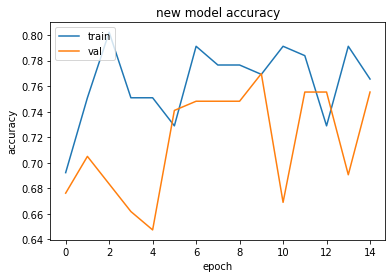

In [22]:
plt.plot(H1.history['accuracy'])
plt.plot(H1.history['val_accuracy'])
plt.title('new model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()